<a href="https://colab.research.google.com/github/Akshitha2403/MS-AICTE_EDUNET/blob/main/Wine_quality_preduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
import pandas as pd
import io



In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")


In [ ]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

<ipython-input-13-61dce6a44aa8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['quality'], palette="viridis")


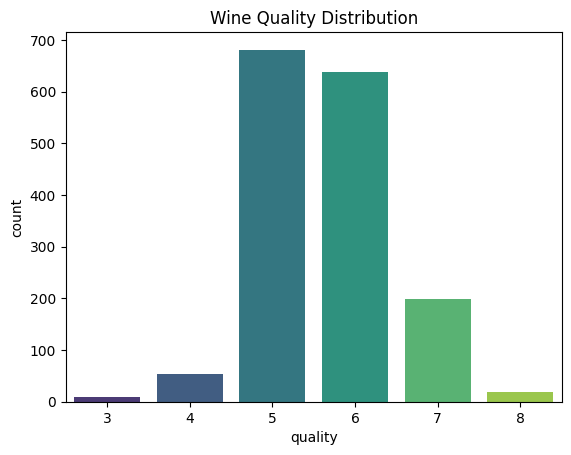

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['quality'], palette="viridis")
plt.title("Wine Quality Distribution")
plt.show()

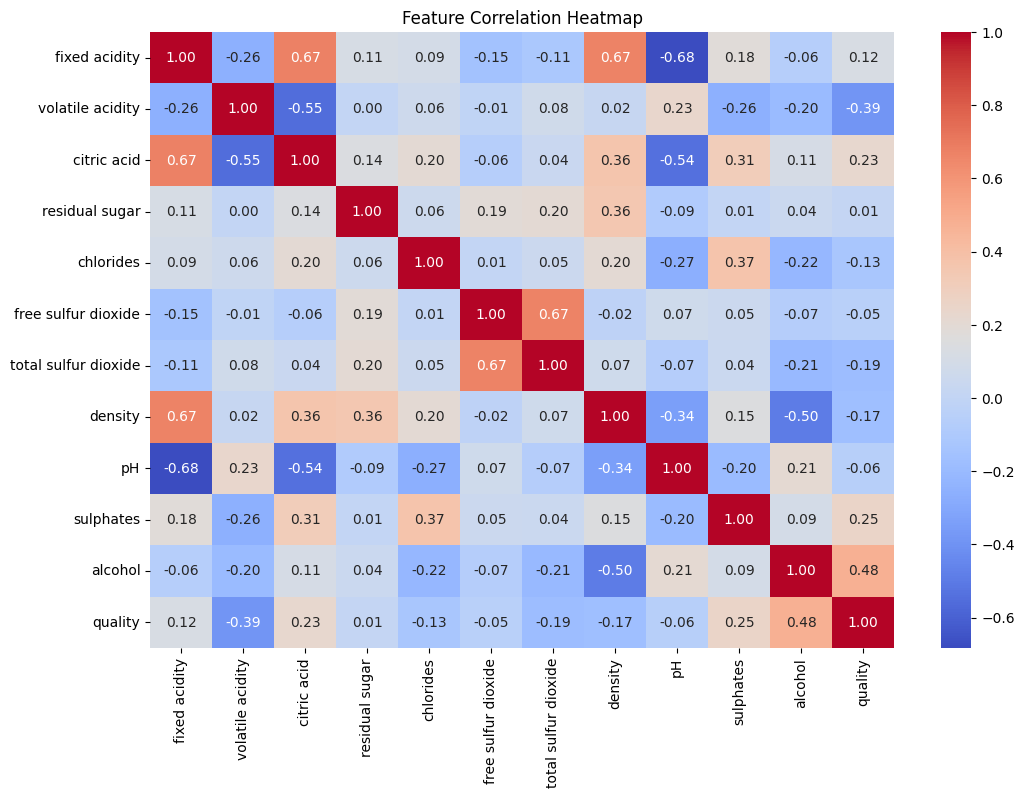

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

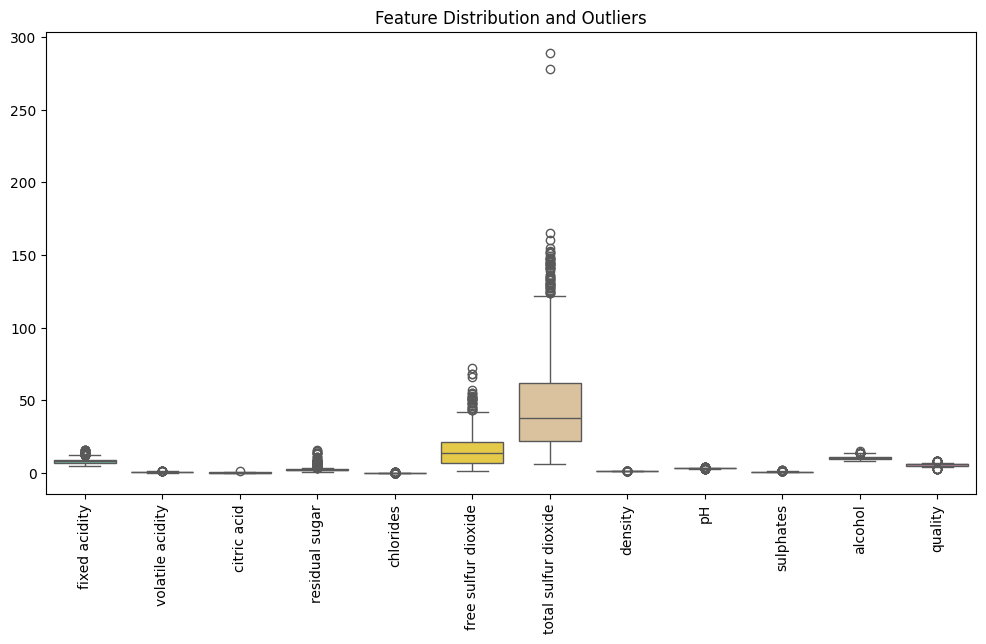

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="Set2")
plt.xticks(rotation=90)
plt.title("Feature Distribution and Outliers")
plt.show()

In [ ]:
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.784375
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       141
           1       0.81      0.81      0.81       179

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320

Confusion Matrix:
 [[106  35]
 [ 34 145]]


<ipython-input-22-a4f8456e558f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=features, y=importances, palette="coolwarm")


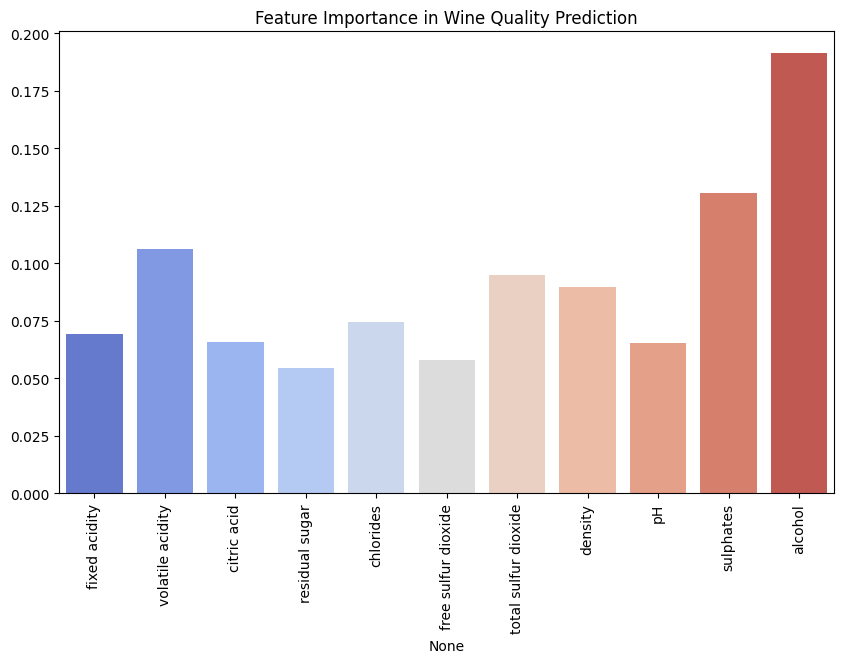

In [ ]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=features, y=importances, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Feature Importance in Wine Quality Prediction")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

🔹 Accuracy: 0.784375

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75       141
           1       0.81      0.81      0.81       179

    accuracy                           0.78       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.78      0.78      0.78       320


🔹 Confusion Matrix:
 [[106  35]
 [ 34 145]]


In [ ]:
new_sample = [[7.5, 0.5, 0.36, 6.1, 0.071, 17, 102, 0.9978, 3.35, 0.8, 10.5]]
new_sample_scaled = scaler.transform(new_sample)

predicted_quality = model.predict(new_sample_scaled)
print("🔹 Predicted Wine Quality:", "Good" if predicted_quality[0] == 1 else "Bad")

🔹 Predicted Wine Quality: Bad


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


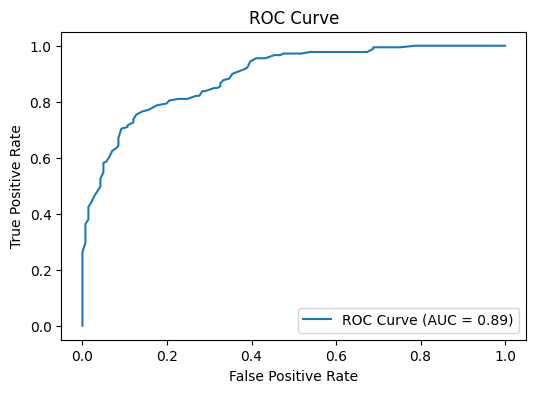

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:

sample_rows = df.sample(n=5, random_state=42)
sample_features = sample_rows.drop("quality", axis=1)
sample_scaled = scaler.transform(sample_features)


predicted_quality = model.predict(sample_scaled)


sample_rows["Predicted Quality"] = ["Good" if q == 1 else "Bad" for q in predicted_quality]
print(sample_rows)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
803             7.7              0.56         0.08            2.50      0.114   
124             7.8              0.50         0.17            1.60      0.082   
350            10.7              0.67         0.22            2.70      0.107   
682             8.5              0.46         0.31            2.25      0.078   
1326            6.7              0.46         0.24            1.70      0.077   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
803                  14.0                  46.0   0.9971  3.24       0.66   
124                  21.0                 102.0   0.9960  3.39       0.48   
350                  17.0                  34.0   1.0004  3.28       0.98   
682                  32.0                  58.0   0.9980  3.33       0.54   
1326                 18.0                  34.0   0.9948  3.39       0.60   

      alcohol  quality Predicted Quality  
803    

In [ ]:

sample_rows = df.sample(n=10, random_state=15)
sample_features = sample_rows.drop("quality", axis=1)
sample_scaled = scaler.transform(sample_features)


predicted_quality = model.predict(sample_scaled)


sample_rows["Predicted Quality"] = ["Good" if q == 1 else "Bad" for q in predicted_quality]
print(sample_rows)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
776             6.9             0.765         0.18             2.4      0.243   
740             8.3             0.760         0.29             4.2      0.075   
1351            7.2             0.620         0.01             2.3      0.065   
794            10.1             0.270         0.54             2.3      0.065   
290             8.7             0.520         0.09             2.5      0.091   
117             7.8             0.560         0.12             2.0      0.082   
896             8.3             0.310         0.39             2.4      0.078   
547            10.6             0.310         0.49             2.5      0.067   
700            10.6             1.020         0.43             2.9      0.076   
1523            6.8             0.480         0.25             2.0      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
776                   5.5      